# 1. Assessment of Data and Applying Normalization (on Abalone Dataset only) 

## 1) Load the dataset and explore the features and their ranges and distribution. Show a couple approaches you use.

In [1]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from google.colab import files
import io
from scipy import stats
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'google'

In [4]:
#upload data
#uploaded_data=files.upload()
abalone = pd.read_csv('abalone.csv')

Dataset Information

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

In [5]:
# Add feature label to data set and find out categorical and numerical feature
D = [ 'Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone.columns=D
print(abalone[:10])
categorical_features=abalone.select_dtypes(include=[np.object]).columns
numerical_features = abalone.select_dtypes(include=[np.number]).columns

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
5   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
6   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
7   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
8   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   
9   F   0.525     0.380   0.140        0.6065          0.1940          0.1475   

   Shell weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
3       

C:\Users\bacha\AppData\Local\Temp/ipykernel_1432/3978666327.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features=abalone.select_dtypes(include=[np.object]).columns


In [5]:
#datatype of features and shape(row and column)
abalone.info()
abalone.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(4176, 9)

In [6]:
# summary of important stastical data of different features
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb704e81350>,
      dtype=object)

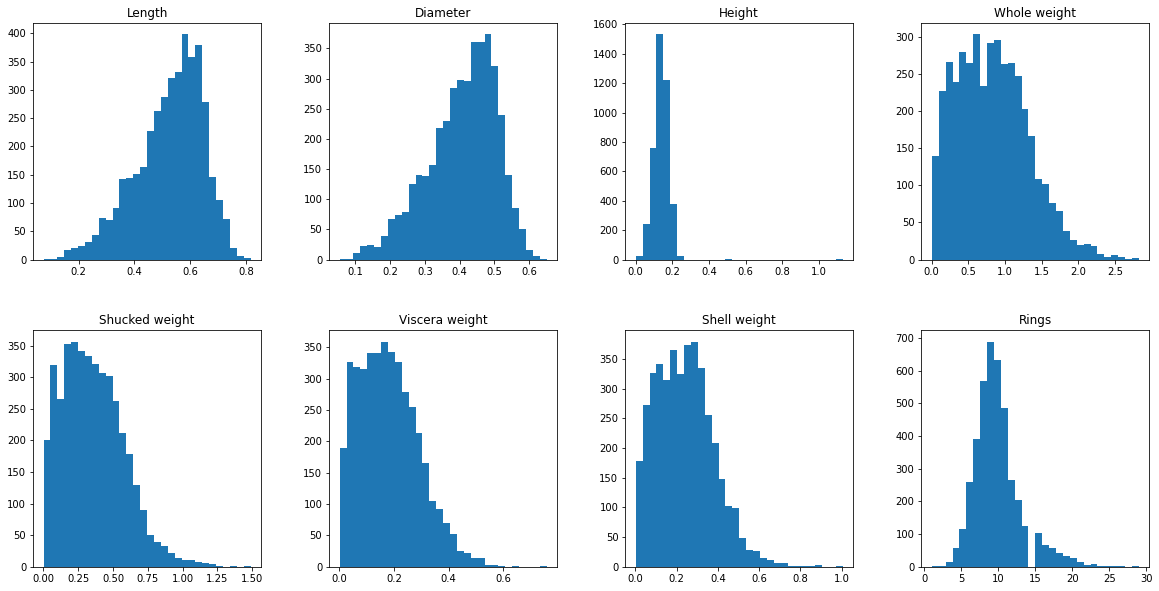

In [9]:
# Find distribution of values across the range of different feature
abalone.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [10]:
# Find skewness of different features. 
for column in numerical_features:
  print(column+" "+str(abalone[column].skew()))

Length -0.6402400446825373
Diameter -0.6094573361250878
Height 3.129240653637621
Whole weight 0.5305757066471319
Shucked weight 0.7187243484570085
Viscera weight 0.5914633408381724
Shell weight 0.6205470323079405
Rings 1.1151569098189447


As all values are around 0-2. So data is not completely distorted. However we can see from the shape that it is not balanced either.  a skewness value > 0 means that there is more weight in the right tail of the distribution.

## 2) Is there any missing data? Present evidence or refer to figures or to earlier tables or figures clearly

In [11]:
# Find total missing value of each feature
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

The dataset doesn't contain any missing values

## 3) Compute the moments or summarization statistics on the data features. Comment on the diversity of data types and ranges of the features.

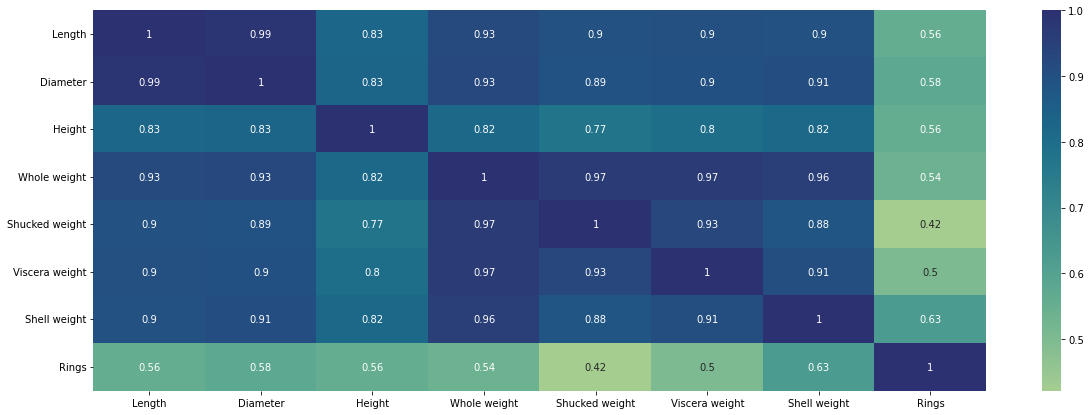

In [12]:
plt.figure(figsize=(20,7))
sns.heatmap(abalone.corr(), annot=True, cmap="crest");

Hence, we can observe that Rings are highly correlated with Shell weight with correlation coefficient 0.63. Moreover, diameter and length are almost linearly correlated. Let's plot bivariate chart to confirm.

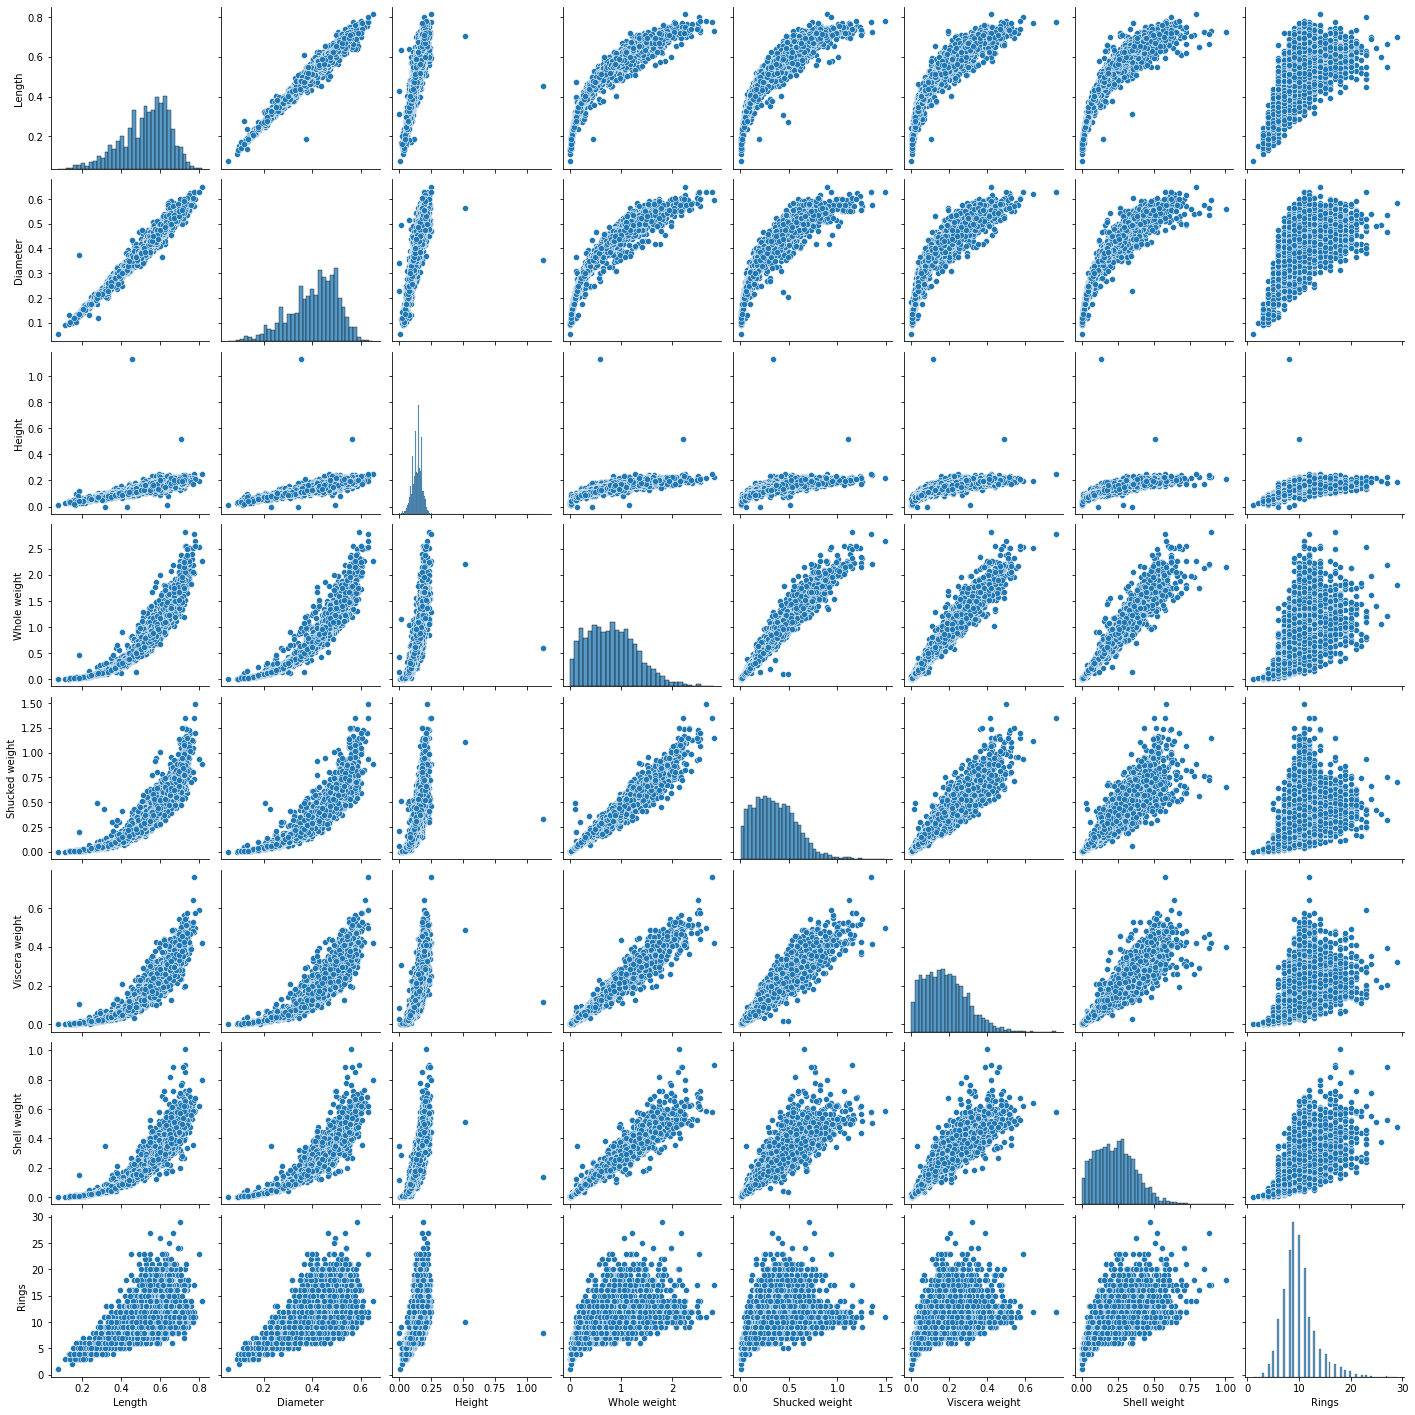

In [13]:
sns.pairplot(abalone[numerical_features])

It gives clear picture on how each features are affected in presence of other features. As correctly predicted, bivariate analysis provides evidence that features Length and Diameter are linearly correlated.

## 4) Outliers

As shown in pairplot , each feature has some co-relation with other feature. For detecting outliers let's compare to all features with target feature(Rings).

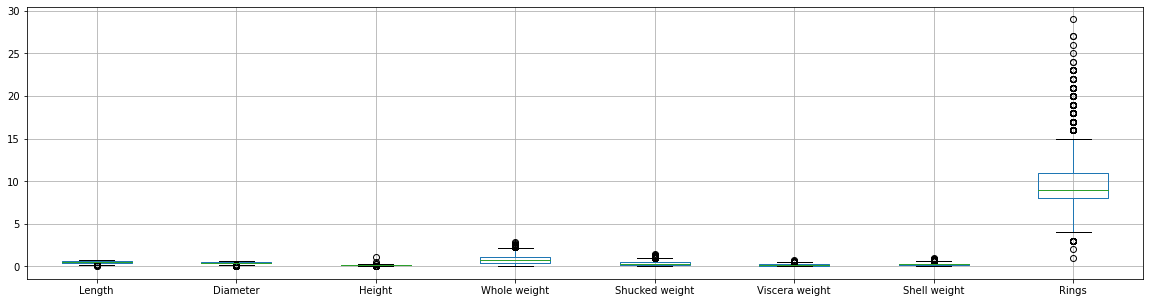

In [14]:
abalone.boxplot( figsize=(20,5))

As we can see that there are few outliers present in all features. We can check correlation of each feature with target variable to remove outliers rather than removing outliers by standard deviation of that feature alone.

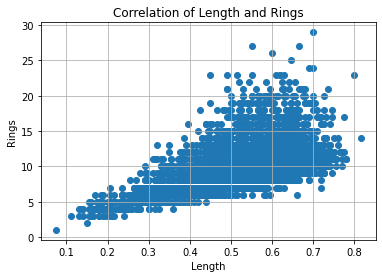

In [15]:
var = 'Length'
plt.title("Correlation of Length and Rings")
plt.xlabel(var)
plt.ylabel('Rings')
plt.scatter(x = abalone[var], y = abalone['Rings'],)
plt.grid(True)
#Outliers

In [16]:
# outliers removal
abalone.drop(abalone[(abalone['Length']> 0.8) & (abalone['Rings'] < 25)].index, inplace=True)
abalone.drop(abalone[(abalone['Length']<0.7) & (abalone['Rings'] > 25)].index, inplace=True)

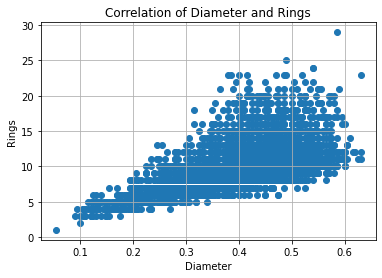

In [17]:
var = 'Diameter'
plt.title("Correlation of Diameter and Rings")
plt.xlabel(var)
plt.ylabel('Rings')
plt.scatter(x = abalone[var], y = abalone['Rings'],)
plt.grid(True)
#Outliers

In [18]:
# outliers removal
abalone.drop(abalone[(abalone['Diameter']> 0.6) & (abalone['Rings'] > 20)].index, inplace=True)

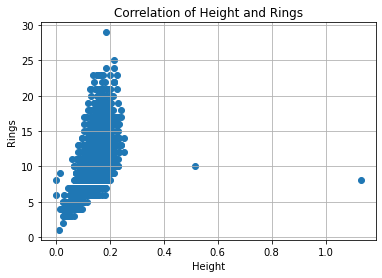

In [19]:
var = 'Height'
plt.title("Correlation of Height and Rings")
plt.xlabel(var)
plt.ylabel('Rings')
plt.scatter(x = abalone[var], y = abalone['Rings'],)
plt.grid(True)
#Outliers

In [20]:
# outliers removal
abalone.drop(abalone[(abalone['Height']> 0.4) & (abalone['Rings'] < 25)].index, inplace=True)

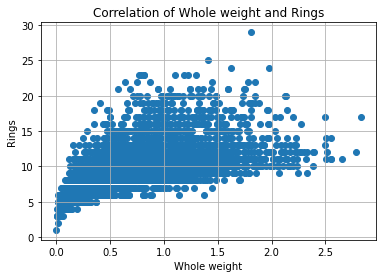

In [21]:
var = 'Whole weight'
plt.title("Correlation of Whole weight and Rings")
plt.xlabel(var)
plt.ylabel('Rings')
plt.scatter(x = abalone[var], y = abalone['Rings'],)
plt.grid(True)
#Outliers

In [22]:
# outliers removal
abalone.drop(abalone[(abalone['Whole weight']< 2.5) & (abalone['Rings'] > 25)].index, inplace=True)

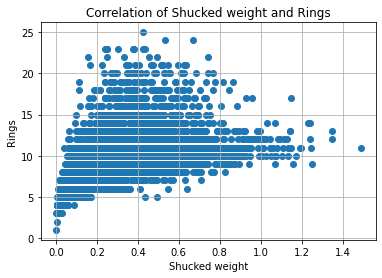

In [23]:
var = 'Shucked weight'
plt.title("Correlation of Shucked weight and Rings")
plt.xlabel(var)
plt.ylabel('Rings')
plt.scatter(x = abalone[var], y = abalone['Rings'],)
plt.grid(True)
#Outliers

In [24]:
# outliers removal
abalone.drop(abalone[(abalone['Shucked weight']> 1.2) & (abalone['Rings'] < 25)].index, inplace=True)

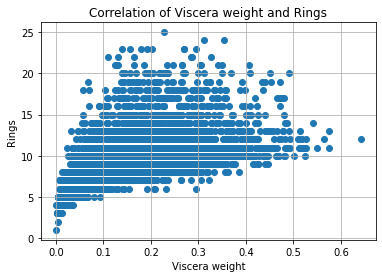

In [25]:
var = 'Viscera weight'
plt.title("Correlation of Viscera weight and Rings")
plt.xlabel(var)
plt.ylabel('Rings')
plt.scatter(x = abalone[var], y = abalone['Rings'],)
plt.grid(True)
#Outliers

In [26]:
# outliers removal
abalone.drop(abalone[(abalone['Viscera weight']> 0.6) & (abalone['Rings'] < 25)].index, inplace=True)

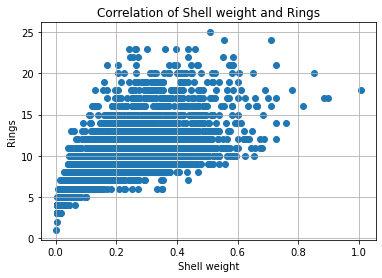

In [28]:
var = 'Shell weight'
plt.title("Correlation of Shell weight and Rings")
plt.xlabel(var)
plt.ylabel('Rings')
plt.scatter(x = abalone[var], y = abalone['Rings'],)
plt.grid(True)
#Outliers

In [ ]:
abalone.drop(abalone[(abalone['Height']> 0.8) & (abalone['Rings'] < 25)].index, inplace=True)

## 5) Is this balanced dataset?

Above boxplot(Q-4) is evident enough that dataset is not balanced. We need to normalize the feature data. To determine target variable is balanced or not, let's see how values are distributed.

In [31]:
abalone.Rings.unique()

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 23,  2, 25, 24])

<Figure size 432x432 with 0 Axes>

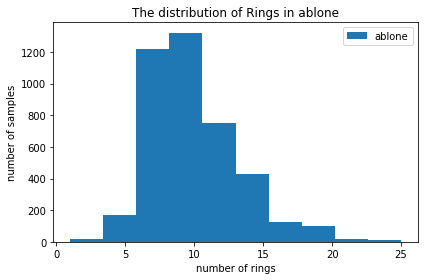

In [32]:
plt.figure(figsize=(6,6))
col='Rings'
abalone.hist(column=col,label="ablone")

plt.title('The distribution of {} in ablone'.format(col))
plt.xlabel('number of rings')
plt.ylabel('number of samples')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()
plt.show()

As we can see that we have different number of samples for different values of RIngs. Hence data is not balanced. However, we can still use this data by normalizing feature variables. 

## 6) Normalisation

### (a) Is normalization necessary for this dataset given what you've seen? Explain why briey.
As we ran the abalone.describe() command above, we can see that range of different features is varying. KNN is a distance based algorithm so without normalisation, feature with higher value will overpower feature with lower value. So now algorithm will give more weightage(bias) towards feature with higher value. 

### b) Using the min-max normalized data, pick two or three numeric features of your own choosing and compare the interaction between the variables and how it differes from the unnormalized data.

In [33]:
#Labelling categoricval data as numerical
abalone['Sex'] = abalone['Sex'].replace({
    "M": 0,
    "F": 1,
    "I": 2,
})

In [36]:
abalone_weight = abalone[['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
abalone_weight.sort_values(by='Whole weight',inplace=True) ## sorting to see the pattern from min to max
abalone_weight.describe()

,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4159.000000,4159.000000,4159.000000,4159.000000
mean,0.823657,0.356795,0.179607,0.237573
std,0.483307,0.217415,0.108225,0.137677
min,0.002000,0.001000,0.000500,0.001500
25%,0.441000,0.185750,0.092750,0.130000
50%,0.796500,0.335000,0.170000,0.231500
75%,1.148750,0.500250,0.252000,0.325000
max,2.825500,1.196500,0.575000,1.005000


Text(0.5, 1.0, 'Unnormalized weight features')

<Figure size 432x288 with 0 Axes>

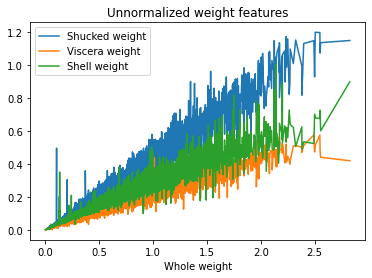

In [46]:
plt.figure()
abalone_weight.plot(x='Whole weight',y=['Shucked weight', 'Viscera weight', 'Shell weight'])
plt.title('Unnormalized weight features')

As we can see that all 3 feature are not normalized. Let's normalize the dataset with min-max method.

In [38]:
#Min-max normalisation
abalone_min_max=(abalone-abalone.min())/(abalone.max()-abalone.min())
abalone_min_max['Sex']=abalone['Sex'] # Sex is a categorical data
abalone_min_max['Rings'] = abalone['Rings'] # Target variable should not be normalized

In [39]:
abalone_min_max_weight = abalone_min_max[['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
abalone_min_max_weight.sort_values(by='Whole weight',inplace=True) ## sorting to see the pattern from min to max
abalone_min_max_weight.describe()

,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4159.000000,4159.000000,4159.000000,4159.000000
mean,0.291007,0.297612,0.311762,0.235250
std,0.171173,0.181861,0.188382,0.137197
min,0.000000,0.000000,0.000000,0.000000
25%,0.155481,0.154538,0.160574,0.128052
50%,0.281388,0.279381,0.295039,0.229198
75%,0.406145,0.417608,0.437772,0.322372
max,1.000000,1.000000,1.000000,1.000000


All min and max are 0 and 1 respectively. mean is also similar to each other.

Text(0.5, 1.0, 'Min-Max normalized wait features')

<Figure size 432x288 with 0 Axes>

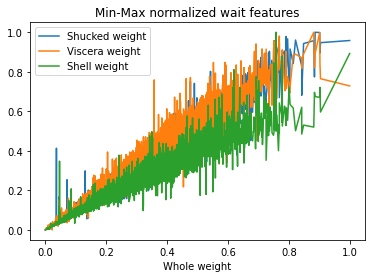

In [47]:
plt.figure()
abalone_min_max_weight.plot(x='Whole weight',y=['Shucked weight', 'Viscera weight', 'Shell weight'])
plt.title("Min-Max normalized wait features")

Now data of all 3 features is normalized(overlap each other).

### c) Performing same analysis with Z score normalisation

In [41]:
# zscore normalization
abalone_zscore=abalone.apply(stats.zscore)
abalone_zscore['Sex']=abalone['Sex']
abalone_zscore['Rings'] = abalone['Rings']

In [42]:
abalone_z_weight = abalone_zscore[['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
abalone_z_weight.sort_values(by='Whole weight',inplace=True) ## sorting to see the pattern from min to max
abalone_z_weight.describe()

,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4.159000e+03,4.159000e+03,4.159000e+03,4.159000e+03
mean,1.632634e-15,7.816141e-17,-1.312300e-15,6.840191e-16
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-1.700279e+00,-1.636678e+00,-1.655148e+00,-1.714891e+00
25%,-7.918440e-01,-7.868170e-01,-8.026566e-01,-7.814376e-01
50%,-5.619776e-02,-1.002584e-01,-8.878146e-02,-4.411811e-02
75%,6.727232e-01,6.599012e-01,6.689889e-01,6.350875e-01
max,4.142470e+00,3.862691e+00,3.653865e+00,5.574765e+00


Though min and max is different, mean value is more similar to each other.

Text(0.5, 1.0, 'Zscore normalized weight features')

<Figure size 432x288 with 0 Axes>

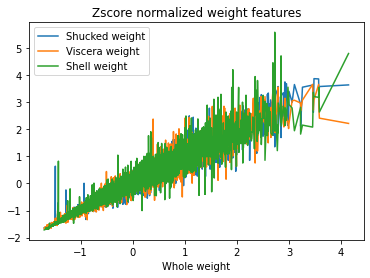

In [48]:
plt.figure()
abalone_z_weight.plot(x='Whole weight',y=['Shucked weight', 'Viscera weight', 'Shell weight'])
plt.title("Zscore normalized weight features")

Now data is more normalized compare to min-max normalization(more overlapped with each other). Hence we will use zscore normalization for classification.

# 2) Classification with KNN (Abalone dataset)

## 1) Divide the data into a training set and a test set (80%, 20%) Note: set the random seed for splitting, use random state=27 in the sci-kit learn train test split function

In [49]:
x=abalone_zscore[['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
y=abalone_zscore['Rings']
print(abalone[:10])

   Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0    0   0.350     0.265  ...          0.0485         0.070      7
1    1   0.530     0.420  ...          0.1415         0.210      9
2    0   0.440     0.365  ...          0.1140         0.155     10
3    2   0.330     0.255  ...          0.0395         0.055      7
4    2   0.425     0.300  ...          0.0775         0.120      8
5    1   0.530     0.415  ...          0.1415         0.330     20
6    1   0.545     0.425  ...          0.1495         0.260     16
7    0   0.475     0.370  ...          0.1125         0.165      9
8    1   0.550     0.440  ...          0.1510         0.320     19
9    1   0.525     0.380  ...          0.1475         0.210     14

[10 rows x 9 columns]


In [50]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20 , random_state=27)

## 2) Train the model with with classifier's default parameter.


In [52]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)
y_pred
c_m = confusion_matrix(test_y,y_pred)
c_m
print('percentage Accuracy using default KNN is : ',100*accuracy_score(test_y,y_pred))

percentage Accuracy using default KNN is :  22.596153846153847


## 3) Find best value of K

In [54]:
k_value = np.empty(50)
test_accuracy = np.empty(50)
for k in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=k)         
    knn.fit(train_x,train_y)
    y_pred = knn.predict(train_x)
    test_accuracy[k] = knn.score(test_x, test_y)
    k_value[k] = k

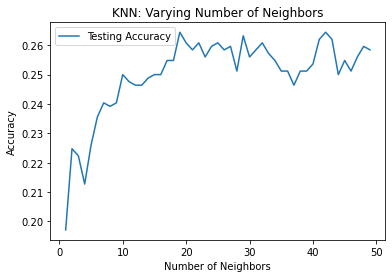

In [55]:
plt.title('KNN: Varying Number of Neighbors')
plt.plot(k_value[1:],test_accuracy[1:], label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [56]:
max_index= np.where(test_accuracy == max(test_accuracy))
print("Max accuracy:",max(test_accuracy),"K value:",k_value[max_index[0]][0])

Max accuracy: 0.2644230769230769 K value: 19.0


## 4) Using weighted KNN

As KNeighborsClassifier() functions give liberty to change weight type as well as which algorithm to use for finding distance (i.e euclidean,manhattan). Using different value of p(default,1,2) and weight=distance because it will have greater influence on near neighbours.
Note: Default and p=2 will give same curve as default value is 2.

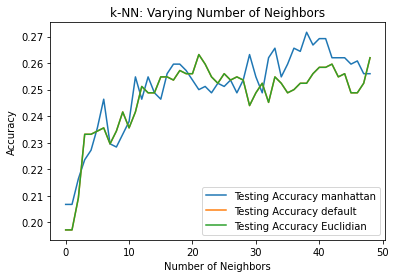

Max accuracy for p=0 : 26.322115384615387 % K value: 21
Max accuracy for p=1 : 27.163461538461537 % K value: 38
Max accuracy for p=2: 26.322115384615387 % K value: 21


In [57]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy_m = np.empty(len(neighbors))
test_accuracy_m = np.empty(len(neighbors))
train_accuracy_e = np.empty(len(neighbors))
test_accuracy_e = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_m = KNeighborsClassifier(n_neighbors=k,p=1,weights='distance') # Manhattan distance
    knn_e = KNeighborsClassifier(n_neighbors=k,p=2,weights='distance') # Euclidian distance
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    # Fit the classifier to the training data
    knn_m.fit(train_x, train_y)
    knn_e.fit(train_x, train_y)
    knn.fit(train_x, train_y)
    #Compute accuracy on the training set
    train_accuracy_m[i] = knn_m.score(train_x, train_y)
    train_accuracy_e[i] = knn_e.score(train_x, train_y)
    train_accuracy[i] = knn.score(train_x, train_y)

    #Compute accuracy on the testing set
    test_accuracy_m[i] = knn_m.score(test_x, test_y)
    test_accuracy_e[i] = knn_e.score(test_x, test_y)
    test_accuracy[i] = knn.score(test_x, test_y)
    neighbors[i]=i

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_m, label = 'Testing Accuracy manhattan')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy default')
plt.plot(neighbors, test_accuracy_e, label = 'Testing Accuracy Euclidian')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## printing max accuracy for each param
print("Max accuracy for p=0 :",max(test_accuracy[1:])*100,"% K value:",neighbors[np.where(test_accuracy == max(test_accuracy[1:]))][0])
print("Max accuracy for p=1 :",max(test_accuracy_m[1:])*100,"% K value:",neighbors[np.where(test_accuracy_m == max(test_accuracy_m[1:]))][0])
print("Max accuracy for p=2:",max(test_accuracy_e[1:])*100,"% K value:",neighbors[np.where(test_accuracy_e == max(test_accuracy_e[1:]))][0])

Getting only 2 charts as default and euclidian are the same thing.

## 5) Ablation Study on Normalization

Removing normalization from data and see how it affects the accuracy. 

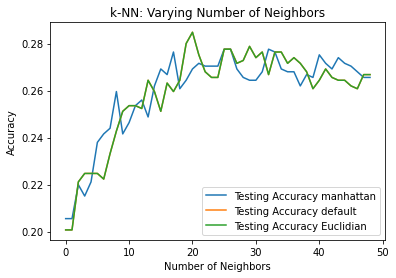

Max accuracy for p=0 : 28.485576923076923 % K value: 20
Max accuracy for p=1 : 27.764423076923077 % K value: 25
Max accuracy for p=2: 28.485576923076923 % K value: 20


In [58]:
x = abalone.drop(['Rings'],axis=1) # taking raw data for training and testing
y = abalone['Rings']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20 , random_state=27)
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy_m = np.empty(len(neighbors))
test_accuracy_m = np.empty(len(neighbors))
train_accuracy_e = np.empty(len(neighbors))
test_accuracy_e = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_m = KNeighborsClassifier(n_neighbors=k,p=1,weights='distance') # Manhattan distance
    knn_e = KNeighborsClassifier(n_neighbors=k,p=2,weights='distance') # Euclidian distance
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    # Fit the classifier to the training data
    knn_m.fit(train_x, train_y)
    knn_e.fit(train_x, train_y)
    knn.fit(train_x, train_y)
    #Compute accuracy on the training set
    train_accuracy_m[i] = knn_m.score(train_x, train_y)
    train_accuracy_e[i] = knn_e.score(train_x, train_y)
    train_accuracy[i] = knn.score(train_x, train_y)

    #Compute accuracy on the testing set
    test_accuracy_m[i] = knn_m.score(test_x, test_y)
    test_accuracy_e[i] = knn_e.score(test_x, test_y)
    test_accuracy[i] = knn.score(test_x, test_y)
    neighbors[i]=i

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_m, label = 'Testing Accuracy manhattan')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy default')
plt.plot(neighbors, test_accuracy_e, label = 'Testing Accuracy Euclidian')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## printing max accuracy for each param
print("Max accuracy for p=0 :",max(test_accuracy[1:])*100,"% K value:",neighbors[np.where(test_accuracy == max(test_accuracy[1:]))][0])
print("Max accuracy for p=1 :",max(test_accuracy_m[1:])*100,"% K value:",neighbors[np.where(test_accuracy_m == max(test_accuracy_m[1:]))][0])
print("Max accuracy for p=2:",max(test_accuracy_e[1:])*100,"% K value:",neighbors[np.where(test_accuracy_e == max(test_accuracy_e[1:]))][0])

As we are getting little bit more accuracy with raw(unnorlamized data) so normalization is **not** needed for this dataset.

# Wine Dataset Classification with KNN

## Assessment of Data referred from assignment 0 student 2

In [62]:
# Load dataset 
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
uploaded_r=files.upload()
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
uploaded_w=files.upload()
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

Saving winequality-red.csv to winequality-red (2).csv


Saving winequality-white.csv to winequality-white (2).csv


In [63]:
#data type and number of rows in data
wine.info()
print(wine.shape, wine_r.shape, wine_w.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB
(6497, 13) (1599, 13) (4898, 13)


All the data is numeric as red is encoded as 1 and white is 0.


In [64]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

0 Missing values

In [65]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f64ab910>]],
      dtype=object)

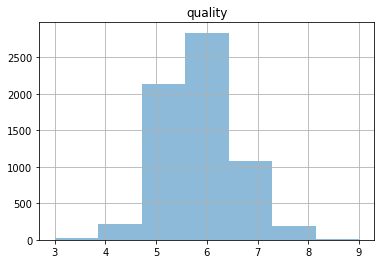

In [66]:
wine.quality.unique()
wine.hist(column='quality', bins=7, alpha=0.5, label="red")

Data is not uniformly distributed hence we can say that dataset is not balanced. Therefore, we need to normalize the data

## Normalisation


### MIN MAX Normalisaion

In [67]:
# min-max normalization
wine_min_max=(wine-wine.min())/(wine.max()-wine.min())

In [68]:
wine_min_max['color'] = wine['color'] ## Reassign categorical data to it's original form
wine_min_max['quality'] = wine['quality'] # target variable should not be normalized
wine_min_max.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,5.818378,0.246114
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.873255,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,5.000000,0.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,6.000000,0.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,6.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000


All attributes are falling under same range(0-1) except quality and color.

<Figure size 432x288 with 0 Axes>

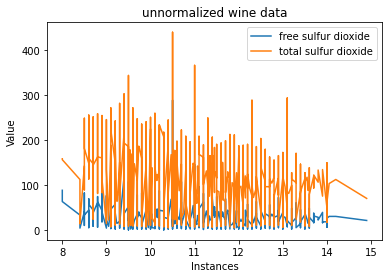

In [69]:
plt.figure()
y = ['free sulfur dioxide' ,'total sulfur dioxide']
wine.sort_values(by='alcohol', inplace=True)
wine.plot(x='alcohol', y=y)
plt.title('unnormalized wine data')
plt.legend(loc='upper right')
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

As above graph shows that data range is quite different hence normalization is highly recommended.

<Figure size 432x288 with 0 Axes>

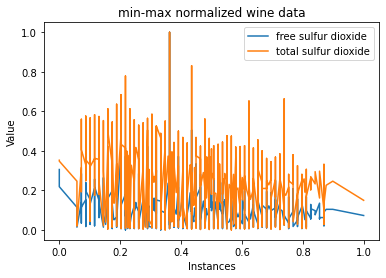

In [70]:
plt.figure()
y = ['free sulfur dioxide' ,'total sulfur dioxide']
wine_min_max.sort_values(by='alcohol', inplace=True)
wine_min_max.plot(x='alcohol', y=y)
plt.title('min-max normalized wine data')
plt.legend(loc='upper right')
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

### Z-Score Normalization

In [72]:
wine_znormalized = wine.apply(stats.zscore)
wine_znormalized['color'] = wine['color'] ## Reassign categorical data to it's original form
wine_znormalized['quality'] = wine['quality']
wine_znormalized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6497.000000
mean,8.713636e-16,-1.587070e-17,9.119653e-16,1.161650e-15,6.883144e-17,-3.199773e-17,6.833588e-17,-5.780439e-15,2.998610e-15,3.661668e-16,-3.439863e-15,5.818378,0.246114
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.873255,0.430779
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,3.000000,0.000000
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,5.000000,0.000000
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,6.000000,0.000000
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,6.000000,0.000000
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,9.000000,1.000000


<Figure size 432x288 with 0 Axes>

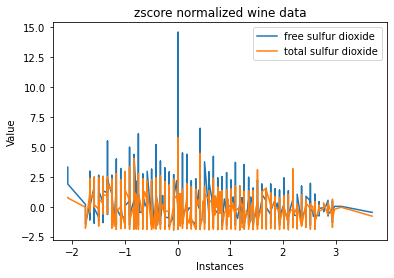

In [73]:
plt.figure()
y = ['free sulfur dioxide' ,'total sulfur dioxide']
wine_znormalized.sort_values(by='alcohol', inplace=True)
wine_znormalized.plot(x='alcohol', y=y)
plt.title('zscore normalized wine data')
plt.legend(loc='upper right')
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

Scale is different in zscore as compared to min-max
However data has some outliers, so we can use z-score as it handles outliers well as compared to min-max normalization

## KNeighbour Classification (Wine Dataset)

### 1) Divided the data into a training set and a test set (80%, 20%) ,Used random state=27 in the sci-kit learn
train_test_split() function on our zscore normalized data to get the same split every time you run the
program.

In [75]:
x = wine_znormalized.drop(['quality'],axis=1)
y = wine_znormalized['quality']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20 , random_state=27)

### 2) Testing knn with default parameters of KNeighborsClassifier()

In [78]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
pred_y = knn.predict(test_x)
print("Accuracy with default KNN is:", 100*accuracy_score(test_y,pred_y))

Accuracy with default KNN is: 56.07692307692308


We got 56% accuracy when trained the model with default params, which are p=2 and n_neighbours=5. 

### 3) Now Let's tune our classifier by plotting test accuracy with different value of k (1-50) and find which k value is best. 

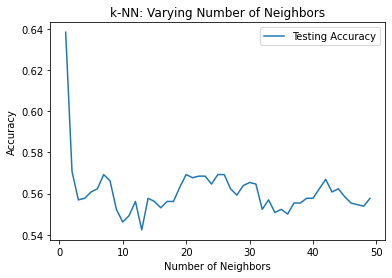

Max accuracy: 57.07692307692308 K value: 2.0


In [80]:
k_value = np.empty(50)
test_accuracy = np.empty(50)

for k in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=k)         
    knn.fit(train_x,train_y)
    pred_y = knn.predict(test_x)
    test_accuracy[k] = accuracy_score(test_y,pred_y)
    k_value[k] = k
    
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(k_value[1:],test_accuracy[1:], label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

max_index= np.where(test_accuracy == max(test_accuracy[2:]))
print("Max accuracy:",max(test_accuracy[2:])*100,"K value:",k_value[max_index[0]][0])

### 4) Weighted KNN

As KNeighborsClassifier() functions give liberty to change weight type as well as which algorithm to use for finding distance (i.e euclidean,manhattan). Using different value of p(default,1,2) and weight=distance because it will have greater influence on near neighbours.
Note: Default and p=2 will give same curve as default value is 2.

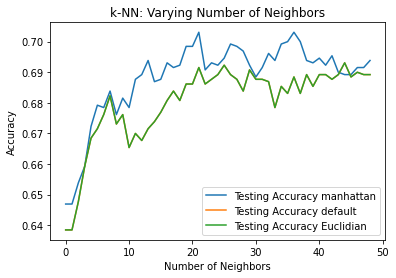

Max accuracy for p=0 : 69.3076923076923 % K value: 44
Max accuracy for p=1 : 70.3076923076923 % K value: 21
Max accuracy for p=2: 69.3076923076923 % K value: 44


In [81]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy_m = np.empty(len(neighbors))
test_accuracy_m = np.empty(len(neighbors))
train_accuracy_e = np.empty(len(neighbors))
test_accuracy_e = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_m = KNeighborsClassifier(n_neighbors=k,p=1,weights='distance') # Manhattan distance
    knn_e = KNeighborsClassifier(n_neighbors=k,p=2,weights='distance') # Euclidian distance
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    # Fit the classifier to the training data
    knn_m.fit(train_x, train_y)
    knn_e.fit(train_x, train_y)
    knn.fit(train_x, train_y)
    #Compute accuracy on the training set
    train_accuracy_m[i] = knn_m.score(train_x, train_y)
    train_accuracy_e[i] = knn_e.score(train_x, train_y)
    train_accuracy[i] = knn.score(train_x, train_y)

    #Compute accuracy on the testing set
    test_accuracy_m[i] = knn_m.score(test_x, test_y)
    test_accuracy_e[i] = knn_e.score(test_x, test_y)
    test_accuracy[i] = knn.score(test_x, test_y)
    neighbors[i]=i
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_m, label = 'Testing Accuracy manhattan')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy default')
plt.plot(neighbors, test_accuracy_e, label = 'Testing Accuracy Euclidian')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## printing max accuracy for each param
print("Max accuracy for p=0 :",max(test_accuracy[1:])*100,"% K value:",neighbors[np.where(test_accuracy == max(test_accuracy[1:]))][0])
print("Max accuracy for p=1 :",max(test_accuracy_m[1:])*100,"% K value:",neighbors[np.where(test_accuracy_m == max(test_accuracy_m[1:]))][0])
print("Max accuracy for p=2:",max(test_accuracy_e[1:])*100,"% K value:",neighbors[np.where(test_accuracy_e == max(test_accuracy_e[1:]))][0])

Graph shows that p=1 and n_neighbours=21 gives highest accuracy (70.30%).

Note: As predicted p=2 and default gave the same accuracy.

### 5) Ablation Study on Normalization

Removing normalization from pipeline and see what's the effect of that.


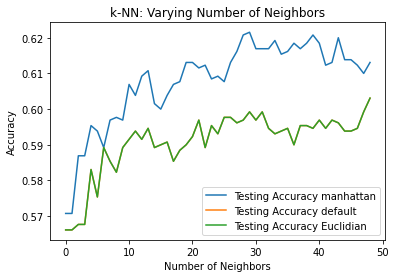

Max accuracy for p=0 : 60.30769230769231 % K value: 48
Max accuracy for p=1 : 62.153846153846146 % K value: 29
Max accuracy for p=2: 60.30769230769231 % K value: 48


In [82]:
# Setup arrays to store train and test accuracies
x = wine.drop(['quality'],axis=1) # taking raw data for training and testing
y = wine['quality']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20 , random_state=27)

neighbors = np.arange(1, 50)
train_accuracy_m = np.empty(len(neighbors))
test_accuracy_m = np.empty(len(neighbors))
train_accuracy_e = np.empty(len(neighbors))
test_accuracy_e = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_m = KNeighborsClassifier(n_neighbors=k,p=1,weights='distance') # Manhattan distance
    knn_e = KNeighborsClassifier(n_neighbors=k,p=2,weights='distance') # Euclidian distance
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    # Fit the classifier to the training data
    knn_m.fit(train_x, train_y)
    knn_e.fit(train_x, train_y)
    knn.fit(train_x, train_y)
    #Compute accuracy on the training set
    train_accuracy_m[i] = knn_m.score(train_x, train_y)
    train_accuracy_e[i] = knn_e.score(train_x, train_y)
    train_accuracy[i] = knn.score(train_x, train_y)

    #Compute accuracy on the testing set
    test_accuracy_m[i] = knn_m.score(test_x, test_y)
    test_accuracy_e[i] = knn_e.score(test_x, test_y)
    test_accuracy[i] = knn.score(test_x, test_y)
    neighbors[i]=i
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_m, label = 'Testing Accuracy manhattan')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy default')
plt.plot(neighbors, test_accuracy_e, label = 'Testing Accuracy Euclidian')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## printing max accuracy for each param
print("Max accuracy for p=0 :",max(test_accuracy[1:])*100,"% K value:",neighbors[np.where(test_accuracy == max(test_accuracy[1:]))][0])
print("Max accuracy for p=1 :",max(test_accuracy_m[1:])*100,"% K value:",neighbors[np.where(test_accuracy_m == max(test_accuracy_m[1:]))][0])
print("Max accuracy for p=2:",max(test_accuracy_e[1:])*100,"% K value:",neighbors[np.where(test_accuracy_e == max(test_accuracy_e[1:]))][0])

Above graph shows that maximum accuracy we can achieve is 62.15% without normalization. Hence it shows why normalization is crucial part.

### References

1.   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2.   https://towardsdatascience.com/normalization-standardization-and-normal-distribution-bfbe14e12df0

3. 657A assignment A0, student notebooks for wine data preprocessing
4. https://archive.ics.uci.edu/ml/datasets/wine+quality
5. https://archive.ics.uci.edu/ml/datasets/abalone


